In [1]:
import FOLPSD as FOLPS
from cosmo_class import *
import time

In [2]:
classy  = run_class(h = 0.6711, ombh2 = 0.022, omch2 = 0.122, omnuh2 = 0.0006442, 
                    As = 2e-9, ns = 0.965, z = 0.3, z_scale=[0.97],
                    N_ur = 2.0328,
                    khmin = 0.0001, khmax = 2.0, nbk = 1000, spectra = 'matter')

In [3]:
inputpkT =classy['k'], classy['pk']

In [4]:
omega_b = 0.02237;             #Baryons
omega_cdm = 0.1200;            #CDM
omega_ncdm = 0.00064420;        #massive neutrinos
h = 0.6736                     #H0/100
A_s =2.0830e-9  #A_s = 2.0830e-9;  
n_s = 0.9649;
    
z_pk = 0.5;                     #z evaluation
    
CosmoParams = [z_pk, omega_b, omega_cdm, omega_ncdm, h]

### FOLPSD

In [5]:
Mmatrices = FOLPS.Matrices()

N = 128 sampling points
M matrices have been computed


In [6]:
%%time
LoopCorrections = FOLPS.NonLinear(inputpkl=inputpkT, CosmoParams=CosmoParams, EdSkernels=False)

CPU times: user 177 ms, sys: 24 ms, total: 201 ms
Wall time: 125 ms


In [7]:
k_ev = np.logspace(np.log10(0.01), np.log10(0.3), num=100) 

In [8]:
"Fixed values: NuisanParams"
b1 = 1.0;      
b2 = 0.2;      
bs2 = -4/7*(b1 - 1);      
b3nl = 32/315*(b1 - 1);
alpha0 = 20;                    #only for reference - does not affect the final result
alpha2 = -58.8;                 #only for reference - does not affect the final result 
alpha4 = 0.0;                       
ctilde = 0.0;    
alphashot0 = -0.073;            #only for reference - does not affect the final result
alphashot2 = -6.38;             #only for reference - does not affect the final result    
PshotP = 1/0.0002118763;        ### it is completely degenerate with alphashot0
x_fog_pk = 0    
x_fig_bk = 0.5

NuisanParams = [b1, b2, bs2, b3nl, alpha0, alpha2, alpha4, 
                    ctilde, alphashot0, alphashot2, PshotP, x_fog_pk]

In [9]:
c1=1.2
c2 = 2.0
Pshot= 1
Bshot = 0.2
a_vir_bk = 1

bisp_nuis_params = [b1, b2, bs2, c1,c2,Pshot,Bshot, a_vir_bk]
bisp_cosmo_params = [(omega_cdm+omega_b+omega_ncdm)/h**2,h]

In [10]:
pklir=FOLPS.pklIR_ini(LoopCorrections[0][0], LoopCorrections[0][1], LoopCorrections[1][1], h=h)

In [11]:
ks = np.logspace(np.log10(0.000001), np.log10(0.4), 50)
k1k2T = np.vstack([ks,ks]).T

In [49]:
%%time
B000_folpsD, B202_folpsD = FOLPS.Bisp_Sugiyama(bisp_cosmo_params, bisp_nuis_params,
                                     pk_input=pklir, z_pk=z_pk, k1k2pairs=k1k2T,
                                        Omfid=-1)

CPU times: user 22.8 ms, sys: 0 ns, total: 22.8 ms
Wall time: 22.1 ms


In [44]:
FOLPS.f0

0.7611472159858693

### FOLPS-NEW

In [14]:
import folps_newtest as folps

✅ Using NumPy with CPU.


In [15]:
f0 = FOLPS.f0
print('f0 =', f0)

f0 = 0.7611472159858693


In [16]:
bispectrum = folps.BispectrumCalculator(basis='sugiyama')

In [17]:
folps.get_linear_ir_ini(LoopCorrections[0][0], LoopCorrections[0][1], LoopCorrections[1][1], h=h)

(array([0.001     , 0.00105361, 0.0011101 , 0.00116961, 0.00123231,
        0.00129838, 0.00136799, 0.00144133, 0.0015186 , 0.00160001,
        0.00168579, 0.00177617, 0.00187139, 0.00197172, 0.00207743,
        0.0021888 , 0.00230615, 0.00242978, 0.00256004, 0.00269729,
        0.0028419 , 0.00299426, 0.00315478, 0.00332391, 0.00350211,
        0.00368987, 0.00388768, 0.00409611, 0.00431571, 0.00454708,
        0.00479085, 0.00504769, 0.00531831, 0.00560343, 0.00590384,
        0.00622035, 0.00655383, 0.00690519, 0.00727538, 0.00766543,
        0.00807638, 0.00850937, 0.00896556, 0.00944622, 0.00995264,
        0.01048622, 0.0110484 , 0.01164072, 0.01226479, 0.01292232,
        0.01361511, 0.01434503, 0.01511408, 0.01592437, 0.0167781 ,
        0.01767759, 0.01862531, 0.01962384, 0.0206759 , 0.02178436,
        0.02295225, 0.02418275, 0.02547922, 0.02684519, 0.02828439,
        0.02980076, 0.03139842, 0.03308173, 0.03485528, 0.03672392,
        0.03869273, 0.0407671 , 0.04295268, 0.04

In [51]:
%%time
B000, B202 = bispectrum.Bisp_Sugiyama(f=f0, f0=f0, bpars=bisp_nuis_params,
                                      pk_input=pklir, z_pk=z_pk,
                                      k1k2pairs=k1k2T, qpar=1, qperp=1, precision=[4, 5, 5], damping='lor')

CPU times: user 18.6 ms, sys: 3.85 ms, total: 22.4 ms
Wall time: 21.2 ms


In [52]:
20/1000

0.02

In [39]:
max(abs(1-B000/B000_folpsD)*100)

0.23257857756244782

In [40]:
abs(1-B202/B202_folpsD)*100

array([0.23063045, 0.23063045, 0.23063045, 0.23063045, 0.23063045,
       0.23063045, 0.23063045, 0.23063045, 0.23063045, 0.23063045,
       0.23063045, 0.23063045, 0.23063045, 0.23063045, 0.23063045,
       0.23063045, 0.23063045, 0.23063045, 0.23063045, 0.23063045,
       0.23063044, 0.23063044, 0.23063043, 0.23063042, 0.23042251,
       0.22868698, 0.22603069, 0.22704003, 0.22901839, 0.23060538,
       0.23189686, 0.23291517, 0.23369527, 0.23429422, 0.23475722,
       0.23511937, 0.23540635, 0.23563138, 0.23578821, 0.2358475 ,
       0.23580143, 0.23585821, 0.23609729, 0.23633167, 0.23691172,
       0.23909854, 0.24828114, 0.29864373, 0.02530711, 0.07549249])

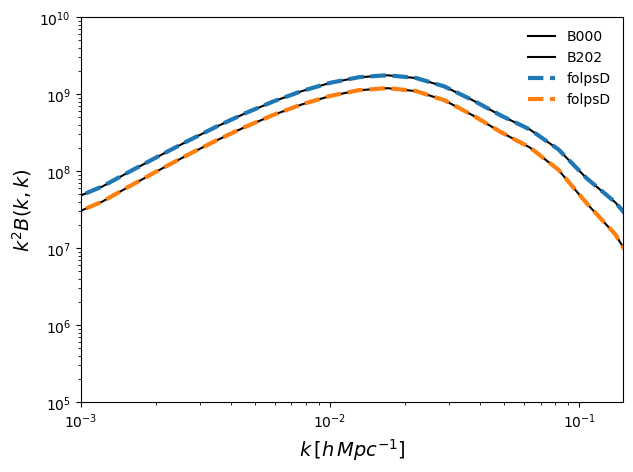

In [41]:
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$k^2 B(k,k) $', fontsize =  14)

#axs.plot(k1k2T.T[0], k1k2T.T[0]*k1k2T.T[0]*B000, ls='-', label='B000')
#axs.plot(k1k2T.T[0],k1k2T.T[0]*k1k2T.T[0]*B202, ls='-', label='B202')


axs.loglog(k1k2T.T[0],B000, ls='-', label='B000', color='k')
axs.loglog(k1k2T.T[0],B202, ls='-', label='B202', color='k')
axs.loglog(k1k2T.T[0],B000_folpsD, ls='--', label='folpsD', lw=3)
axs.loglog(k1k2T.T[0],B202_folpsD, ls='--', label='folpsD', lw=3)
#axs.loglog(nonlinear.inputpkT[0],nonlinear.inputpkT[1]*nonlinear.inputpkT[1], ls='-', label='P^2')



axs.set_xlim([0.001,0.15])
axs.set_ylim([1e5, 1e10])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()

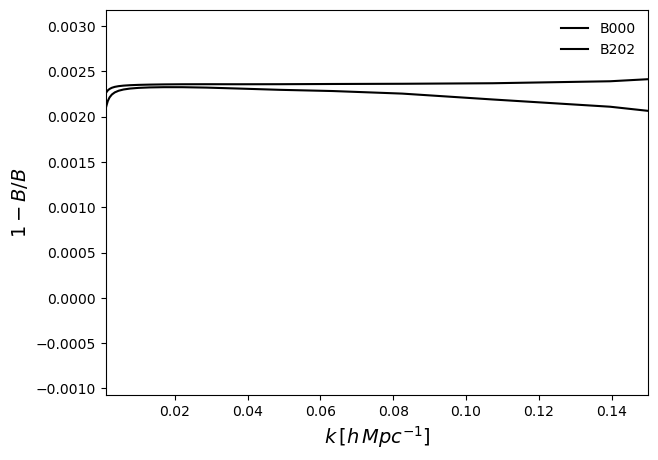

In [42]:
import matplotlib
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(7,5))
axs.set_xlabel(r'$k \, [h\, Mpc^{-1}]$', fontsize =  14)
axs.set_ylabel(r'$1 - B/B $', fontsize =  14)

#axs.plot(k1k2T.T[0], k1k2T.T[0]*k1k2T.T[0]*B000, ls='-', label='B000')
#axs.plot(k1k2T.T[0],k1k2T.T[0]*k1k2T.T[0]*B202, ls='-', label='B202')


axs.plot(k1k2T.T[0], 1 - B000/B000_folpsD, ls='-', label='B000', color='k')
axs.plot(k1k2T.T[0], 1 - B202/B202_folpsD, ls='-', label='B202', color='k')

#axs.loglog(k1k2T.T[0],B202, ls='-', label='B202', color='k')
#axs.loglog(k1k2T.T[0],B000_folpsD, ls='--', label='folpsD', lw=3)
#axs.loglog(k1k2T.T[0],B202_folpsD, ls='--', label='folpsD', lw=3)
#axs.loglog(nonlinear.inputpkT[0],nonlinear.inputpkT[1]*nonlinear.inputpkT[1], ls='-', label='P^2')



axs.set_xlim([0.001,0.15])
#axs.set_ylim([1e5, 1e10])

leg1 = axs.legend(loc = 'best');
leg1.get_frame().set_linewidth(0.0);

plt.show()